<a href="https://colab.research.google.com/github/gmezaarrepol/informacionCovid/blob/master/covid19_chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graficos COVID-19 Chile
Gonzalo Meza Arrepol



In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


# Data conectada desde GitHub Ministerio de Ciencias

In [0]:
# conexion a data comuna diaria
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv'

datamin = pd.read_csv(url, error_bad_lines=False)

datamin = datamin.set_index('Fecha')
datamin = datamin.fillna(0)
datamin = datamin.T
datamin.reset_index(inplace=True)
datamin.rename(columns={'index':'Fecha'}, inplace=True)


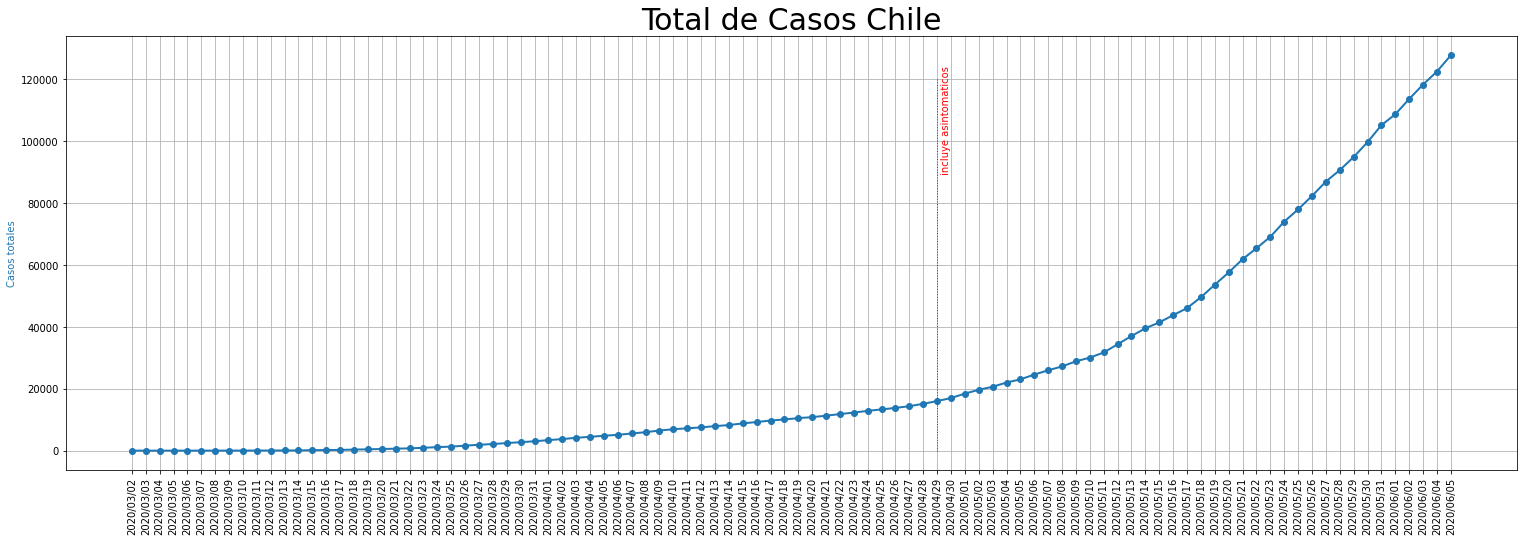

In [0]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:blue'
ax3.set_ylabel('Casos totales', color=color)
ax3.plot('Fecha', 'Casos totales', data=datamin ,color=color,linewidth=2.0, marker='o')
ax3.set_xticklabels(fecha , rotation = 90)
plt.title('Total de Casos Chile', fontsize=30)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos)
x1 = 58
x2 = 58
y1 = 0
y2 = 120000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 30000), color = 'r', rotation=90)
plt.show()

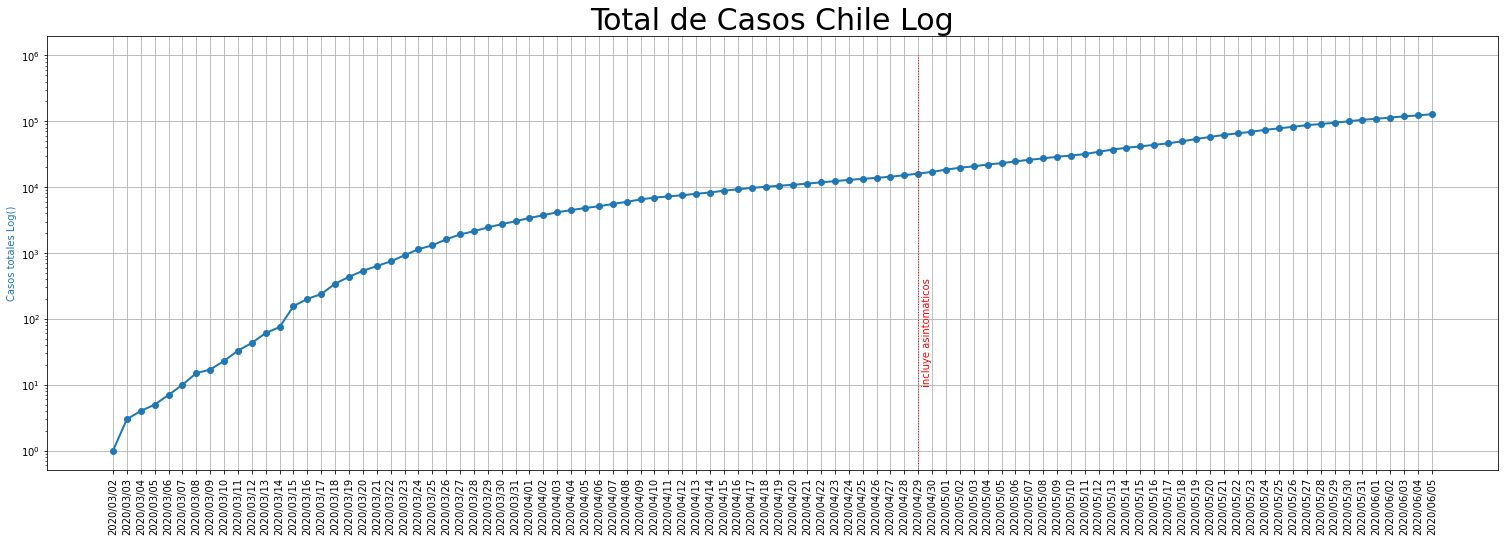

In [0]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:blue'
ax3.set_ylabel('Casos totales Log()', color=color)
ax3.plot('Fecha', 'Casos totales', data=datamin ,color=color,linewidth=2.0, marker='o')
plt.title('Total de Casos Chile Log', fontsize=30)
ax3.set_xticklabels(fecha , rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla
plt.yscale('log')

# cambio en la metodologia de cuenta (se incluyen asintomaticos)
x1 = 58
x2 = 58
y1 = 0
y2 = 1000000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y1 + 10), color = 'r', rotation=90)
plt.show()

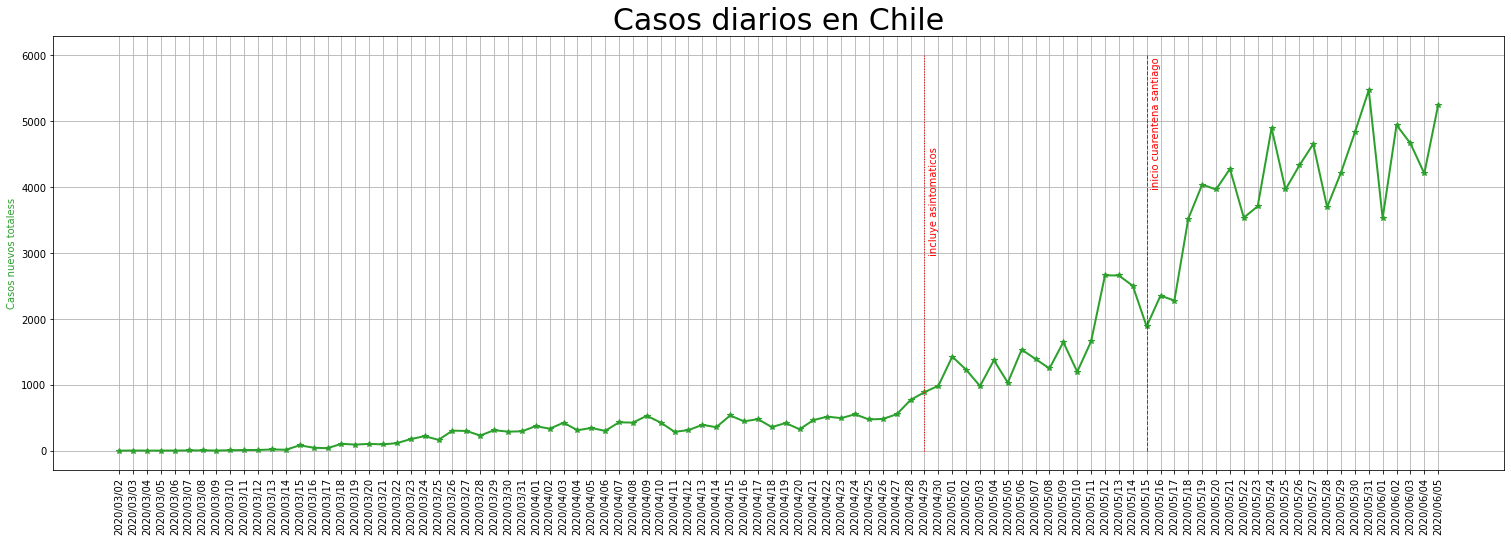

In [0]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:green'
ax3.set_ylabel('Casos nuevos totaless', color=color)
ax3.plot('Fecha', 'Casos nuevos totales', data=datamin ,color=color,linewidth=2.0, marker='*')
plt.title('Casos diarios en Chile', fontsize=30)
ax3.set_xticklabels(fecha , rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos)
x1 = 58
x2 = 58
y1 = 0
y2 = 6000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 3000), color = 'r', rotation=90)

# inicio de la cuarentena en sanitago
x10 = 74
x20 = 74
y10 = 0
y20 = 6000
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('inicio cuarentena santiago', xy=(x2, y2), xytext=(x20 + 0.3, y20 - 2000), color = 'r', rotation=90)
plt.show()

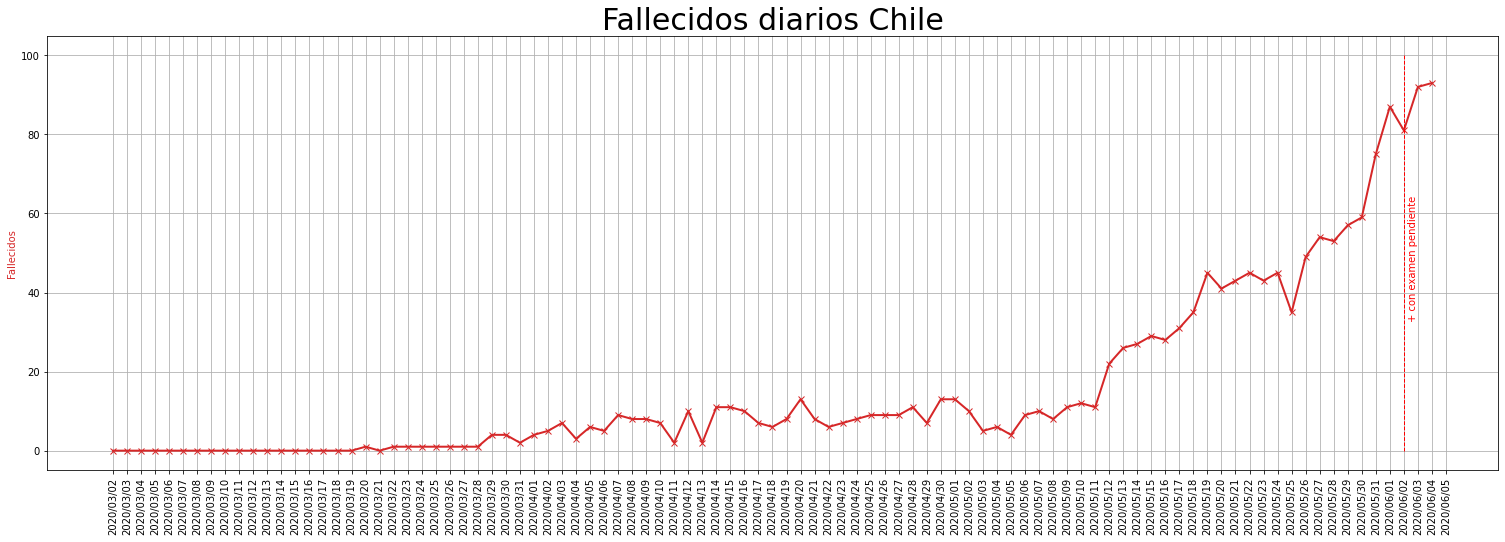

In [0]:
datamin['diaFallecidos'] = datamin['Fallecidos'].shift(-1) - datamin['Fallecidos'] 

fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:red'
ax3.set_ylabel('Fallecidos', color=color)
ax3.plot('Fecha', 'diaFallecidos', data=datamin ,color=color,linewidth=2.0, marker='x')
plt.title('Fallecidos diarios Chile', fontsize=30)
ax3.set_xticklabels(fecha , rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# a partir de la fecha 02/06 se suman aquellos que aun no estaban confirmados 
# inicio de la cuarentena en sanitago
x10 = 92
x20 = 92
y10 = 0
y20 = 100
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('+ con examen pendiente', xy=(x20, y20), xytext=(x20 + 0.3, y20/3), color = 'r', rotation=90)
plt.show()


In [0]:
datamin.tail()

Fecha,Fecha,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales
91,2020-06-02,3206.0,108686.0,0.0,1188.0,21325.0,321.0,3527.0
92,2020-06-03,4537.0,113628.0,0.0,1275.0,21605.0,405.0,4942.0
93,2020-06-04,4172.0,118292.0,0.0,1356.0,21305.0,492.0,4664.0
94,2020-06-05,3790.0,122499.0,0.0,1448.0,21693.0,417.0,4207.0
95,2020-06-06,4888.0,127745.0,0.0,1541.0,22387.0,358.0,5246.0
